### FINAL YEAR PROJECT DATA ANALYSIS


<img src="Society.png" alt="description of the image" width="750" height="750" >

Hii, I'm Roddiyyat.

For my final year university project, I'm building a machine learning model that can predict stroke prevalence in the general population based on a few demographics. I'm doing everything from scratch. From the process of manually collecting the data, inputting it to a spreadsheet, turning it into a csv file, cleaning, analyzing and tidying the data, building our prediction model and then finally deploying it. 
The fun aspect of this is that I'm going to be learning and implementing my learned skills in this project. I'm super excited about this.

### AIM OF PROJECT

Predicting stroke prevalence based on demographics is a valuable endeavor, especially considering the impact it can have on public health. Let's break down the steps we are going to be working through:

1. **Data Collection:**
   - Manually collecting data was time-consuming but it provided me with a deeper understanding of the dataset. 
   - Demographic features includes age, gender, ethnicity, socioeconomic status, and lifestyle factors.

2. **Data Preparation:**
   - Inputting data into a spreadsheet is a good start. The data is organized properly, with each row representing an individual and columns for different features.
   - Converting the spreadsheet to a CSV file is straightforward and will allow us to work with the data programmatically.

3. **Data Cleaning and Tidying:**
   - This step is crucial. We will remove any missing values, outliers, or inconsistencies.
   - Tidy the data by structuring it in a way that facilitates analysis; using tools like pandas in Python for data manipulation.

4. **Exploratory Data Analysis (EDA):**
   - Explore the dataset visually and statistically. Look for patterns, correlations, and potential predictors.
   - Visualizations (histograms, scatter plots, etc.) can reveal insights.

5. **Feature Selection and Engineering:**
   - Decide which features are relevant for predicting stroke prevalence. We will use domain knowledge or consult medical literature.
   - Create new features if needed (e.g., BMI from height and weight).

6. **Model Building:**
   - Choose an appropriate machine learning algorithm (e.g., logistic regression, decision trees, or neural networks).
   - Split our data into training and validation sets.
   - Train our model using the training data and evaluate its performance on the validation set.

7. **Model Deployment:**
   - Once satisfied with our model's performance, deploy it. We can create a web app, API, or integrate it into an existing platform.
   - Ensure that the deployment environment is secure and reliable.



### 1.0 Libaries and Configurations

In [1]:
"""import relevant libraries"""
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss
from math import sqrt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.inspection import permutation_importance
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Markdown, display # for markdown function

### 2.0 Data Wrangling

The first step is to analyse, clean and wrangle our data so we can best understand our dataset

### 2.1 Load your dataset into your environment

In [2]:
Stroke_data = pd.read_csv('Stroke Data Collection Template - Filtered Data.csv')

Stroke_data.head()

,Unit Folder Number,Year,Sex,Age,Ave length of Stay,Dead of Alive,Stroke Type,Location,Religion,Number of Kids,...,Hypertensive,Blood pressure Level,Obesity,BMI,Pulse Rate,Medical History,Smoker,Alcohol Intake,Illegal drugs,Diagnosis
0,15112,2021,F,45,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3,...,Yes,210/106mmHg,No,26.65kg/m2,106bpm,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
1,37001,2022,M,65,5 Days,DAMA,Hemispheric Ischaemic Stroke,Suburban,Muslim,-,...,Yes,170/100mmHg,No,-,78bpm,Lepcomatous Patient on DIOS,No,No,No,Ischemic Stroke
2,37001,2022,M,55,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,-,...,Yes,178/100mmHg,No,-,78bpm,Poorly controlled Bloop pressure,No,No,No,Ischemic Stroke complicated by Aphasia
3,358379,2022,F,60,-,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,-,...,Yes,110/70mmHg,No,-,72bpm,"Parkison disease, Chronic daily headache",No,No,No,Ischemic Stroke
4,396345,2019,M,47,23 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,-,...,No,160/110mmHg,No,-,114bpm,"Constant vomiter, Systemic Hypertension",No,No,Yes,Ischemic Stroke


### 2.2 Cleaning, Tidying, Wragling

During the data collection process, we had some missing values, so this is our time to clean the data and drop redundant columns

While collecting the data, i inputed units for BMI, PR, BP-Level; not its making cleaning our data harder; but nothing that can't be resolved.

In [3]:


# Step 1: Handling Missing Values
missing_counts = Stroke_data.isnull().sum()
print("Number of missing values in each column:")
print(missing_counts)


# Replace "-" with "N/A" in the entire DataFrame
Stroke_data.replace('-', 'N/A', inplace=True)


# Step 2: Dropping Redundant Columns
columns_to_drop = ['Unit Folder Number', 'Year']  # Add other columns as needed
Stroke_data.drop(columns=columns_to_drop, inplace=True)


# Step 3: Data Cleaning and Tidying
Stroke_data.columns = Stroke_data.columns.str.lower()


# Save the cleaned dataset to a new CSV file
Stroke_data.to_csv('cleaned_stroke_dataset.csv', index=False)


print("Data cleaning and tidying completed. Cleaned dataset saved as 'cleaned_stroke_dataset.csv'.")


Number of missing values in each column:
Unit Folder Number      0
Year                    0
Sex                     0
Age                     0
Ave length of Stay      0
Dead of Alive           0
Stroke Type             0
Location                0
Religion                0
Number of Kids          0
Marital Status          0
Occupation              0
Family History          1
Diabetics               0
Hypertensive            0
Blood pressure Level    0
Obesity                 0
BMI                     2
Pulse Rate              2
Medical History         1
Smoker                  0
Alcohol Intake          0
Illegal drugs           0
Diagnosis               0
dtype: int64
Data cleaning and tidying completed. Cleaned dataset saved as 'cleaned_stroke_dataset.csv'.


In [4]:
cleaned_stoke_data = pd.read_csv('cleaned_stroke_dataset.csv')

cleaned_stoke_data.head()

,sex,age,ave length of stay,dead of alive,stroke type,location,religion,number of kids,marital status,occupation,...,hypertensive,blood pressure level,obesity,bmi,pulse rate,medical history,smoker,alcohol intake,illegal drugs,diagnosis
0,F,45.0,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3.0,Widoweded,Trader,...,Yes,210/106mmHg,No,26.65kg/m2,106bpm,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
1,M,65.0,5 Days,DAMA,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Driver,...,Yes,170/100mmHg,No,NaN,78bpm,Lepcomatous Patient on DIOS,No,No,No,Ischemic Stroke
2,M,55.0,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Civil Servant,...,Yes,178/100mmHg,No,NaN,78bpm,Poorly controlled Bloop pressure,No,No,No,Ischemic Stroke complicated by Aphasia
3,F,60.0,NaN,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,NaN,Married,Full House Wife,...,Yes,110/70mmHg,No,NaN,72bpm,"Parkison disease, Chronic daily headache",No,No,No,Ischemic Stroke
4,M,47.0,23 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,NaN,Married,Entrepreneur,...,No,160/110mmHg,No,NaN,114bpm,"Constant vomiter, Systemic Hypertension",No,No,Yes,Ischemic Stroke


### 2.3 Check the Information of the New Dataset

In [5]:
cleaned_stoke_data.head()

,sex,age,ave length of stay,dead of alive,stroke type,location,religion,number of kids,marital status,occupation,...,hypertensive,blood pressure level,obesity,bmi,pulse rate,medical history,smoker,alcohol intake,illegal drugs,diagnosis
0,F,45.0,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3.0,Widoweded,Trader,...,Yes,210/106mmHg,No,26.65kg/m2,106bpm,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
1,M,65.0,5 Days,DAMA,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Driver,...,Yes,170/100mmHg,No,NaN,78bpm,Lepcomatous Patient on DIOS,No,No,No,Ischemic Stroke
2,M,55.0,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Civil Servant,...,Yes,178/100mmHg,No,NaN,78bpm,Poorly controlled Bloop pressure,No,No,No,Ischemic Stroke complicated by Aphasia
3,F,60.0,NaN,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,NaN,Married,Full House Wife,...,Yes,110/70mmHg,No,NaN,72bpm,"Parkison disease, Chronic daily headache",No,No,No,Ischemic Stroke
4,M,47.0,23 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,NaN,Married,Entrepreneur,...,No,160/110mmHg,No,NaN,114bpm,"Constant vomiter, Systemic Hypertension",No,No,Yes,Ischemic Stroke


In [6]:
cleaned_stoke_data.describe()

,age,number of kids
count,213.000000,44.000000
mean,63.244131,4.318182
std,12.978448,2.826558
min,29.000000,1.000000
25%,55.000000,3.000000
50%,65.000000,3.000000
75%,74.000000,5.250000
max,93.000000,14.000000


In [7]:
cleaned_stoke_data.values

array([['F', 45.0, '12 Days', ..., 'No', 'Yes',
        'Ischemic stroke with poorly maintained Hypertension'],
       ['M', 65.0, '5 Days', ..., 'No', 'No', 'Ischemic Stroke'],
       ['M', 55.0, '4 Days', ..., 'No', 'No',
        'Ischemic Stroke complicated by Aphasia'],
       ...,
       ['F', 63.0, '10 Days', ..., 'No', 'No', 'Ischemic Stroke'],
       ['M', 30.0, '11 Days', ..., 'No', 'No', 'Ischemic Stroke'],
       ['F', 65.0, '1 Day', ..., 'No', 'No', 'Ischemic Stroke']],
      dtype=object)

In [8]:
cleaned_stoke_data.shape

(214, 22)

In [9]:
cleaned_stoke_data.index

RangeIndex(start=0, stop=214, step=1)

In [10]:
cleaned_stoke_data.columns

Index(['sex', 'age', 'ave length of stay', 'dead of alive', 'stroke type',
       'location', 'religion', 'number of kids', 'marital status',
       'occupation', 'family history', 'diabetics', 'hypertensive',
       'blood pressure level', 'obesity', 'bmi', 'pulse rate',
       'medical history', 'smoker', 'alcohol intake', 'illegal drugs',
       'diagnosis'],
      dtype='object')

In [11]:
cleaned_stoke_data.dropna()

,sex,age,ave length of stay,dead of alive,stroke type,location,religion,number of kids,marital status,occupation,...,hypertensive,blood pressure level,obesity,bmi,pulse rate,medical history,smoker,alcohol intake,illegal drugs,diagnosis
0,F,45.0,12 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Christian,3.0,Widoweded,Trader,...,Yes,210/106mmHg,No,26.65kg/m2,106bpm,"Chest palpation, Menstral irregularities",No,No,Yes,Ischemic stroke with poorly maintained Hyperte...
16,M,75.0,14 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,2.0,Married,Retired,...,Yes,150/100mmHg,Yes,29.96kg/m2,79bpm,Had a Previous Case of Stroke Emergency,No,No,Yes,Ischemic Stroke
93,F,80.0,24 Days,Alive,Right Hemispheric Ischaemic Stroke,Suburban,Muslim,11.0,Married,Retired,...,Yes,140/90mmHg,Yes,35kg/m2,108bpm,"Systemic Hypertension, Lumbar Spondylosis",No,No,No,Ischemic Stroke
120,F,57.0,19 Days,Alive,Left Hemispheric Ischaemic Stroke,Suburban,Christian,4.0,Married,Trader,...,Yes,130/80mmHg,Yes,37.5kg/m2,82bpm,"Had a Previous Case of Stroke Emergency, Syste...",No,No,No,Ischemic Stroke sepsis focus in the chest on B...
208,F,81.0,7 Days,Alive,Hemispheric Ischaemic Stroke,Urban,Christian,1.0,Widoweded,Civil Servant,...,Yes,130/80mmHg,No,25kg/m2,82bpm,Had a Previous Case of Stroke Emergency,Yes,Yes,Yes,Ischemic Stroke


In [12]:
cleaned_stoke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sex                   214 non-null    object 
 1   age                   213 non-null    float64
 2   ave length of stay    212 non-null    object 
 3   dead of alive         214 non-null    object 
 4   stroke type           214 non-null    object 
 5   location              214 non-null    object 
 6   religion              214 non-null    object 
 7   number of kids        44 non-null     float64
 8   marital status        214 non-null    object 
 9   occupation            213 non-null    object 
 10  family history        213 non-null    object 
 11  diabetics             213 non-null    object 
 12  hypertensive          213 non-null    object 
 13  blood pressure level  214 non-null    object 
 14  obesity               213 non-null    object 
 15  bmi                   1

In [13]:
cleaned_stoke_data.tail()

,sex,age,ave length of stay,dead of alive,stroke type,location,religion,number of kids,marital status,occupation,...,hypertensive,blood pressure level,obesity,bmi,pulse rate,medical history,smoker,alcohol intake,illegal drugs,diagnosis
209,M,65.0,4 days,Alive,Hemispheric Ischaemic Stroke,Rural,Muslim,1.0,Married,Lawyer,...,Yes,148/90mmHg,No,NaN,65bpm,Systemic Hypertension,No,No,No,Ischemic Stroke
210,M,65.0,4 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Driver,...,No,150/100mmHg,No,NaN,113bpm,NaN,No,No,No,Ischemic Stroke
211,F,63.0,10 Days,Alive,Hemispheric Ischaemic Stroke,Rural,Christian,NaN,Widoweded,Trader,...,Yes,120/70mmHg,No,NaN,73bpm,Systemic Hypertension,No,No,No,Ischemic Stroke
212,M,30.0,11 Days,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Entrepreneur,...,Yes,110/70mmHg,No,NaN,100bpm,NaN,No,No,No,Ischemic Stroke
213,F,65.0,1 Day,Alive,Hemispheric Ischaemic Stroke,Suburban,Muslim,NaN,Married,Trader,...,No,170/110mmHg,No,NaN,97bpm,NaN,No,No,No,Ischemic Stroke


### 3.0 Exploratory Data Analysis(EDA)
Let’s dive into visual exploration of your stroke dataset. We’ll create relevant plots to gain insights into the distribution of features.

3.1 Histograms for Numeric Features (e.g., Age, BMI):Histograms help us understand the distribution of continuous numeric variables.

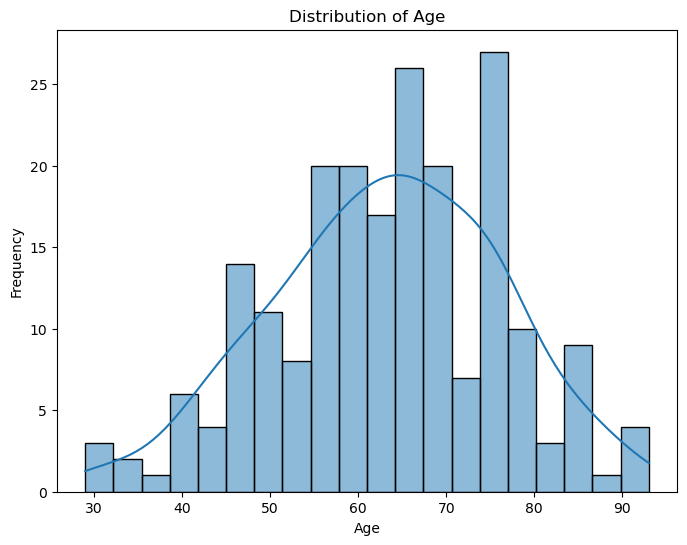

In [14]:
# Example: Histogram for Age

plt.figure(figsize=(8, 6))
sns.histplot(cleaned_stoke_data['age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

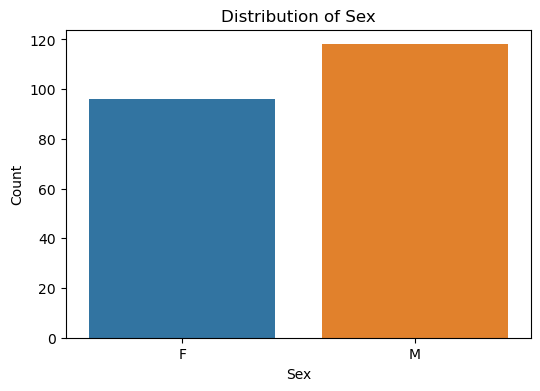

In [15]:
# Example: Bar plot for Sex

plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=cleaned_stoke_data)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

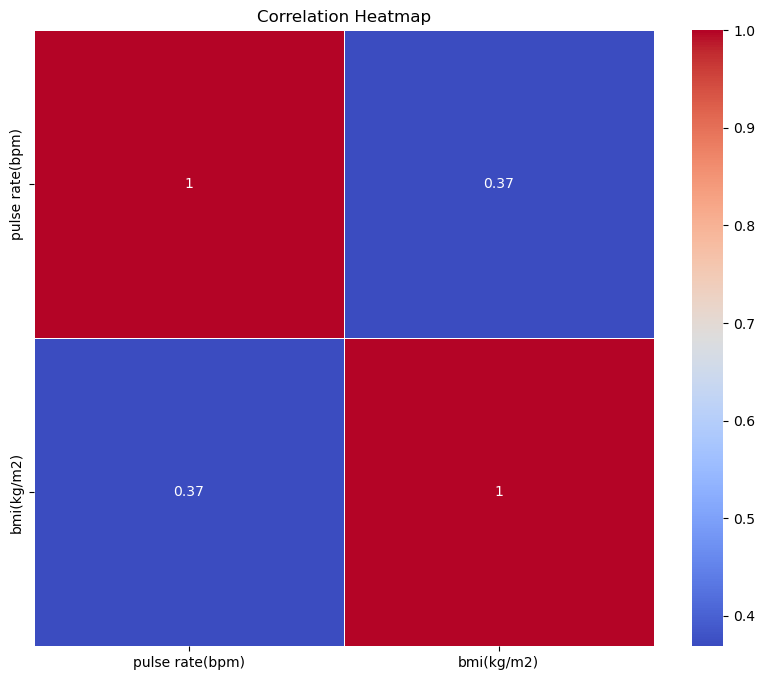

In [ ]:
# Identify the column with non-numeric values (e.g., 'pulse_rate')
problematic_column = 'pulse rate(bpm)'

# Replace non-numeric values (e.g., 'F') with NaN
cleaned_stoke_data[problematic_column] = cleaned_stoke_data[problematic_column].replace('F', float('nan'))

# Create a heatmap (example using 'pulse_rate' and 'bmi')
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_stoke_data[['pulse rate(bpm)', 'bmi(kg/m2)']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

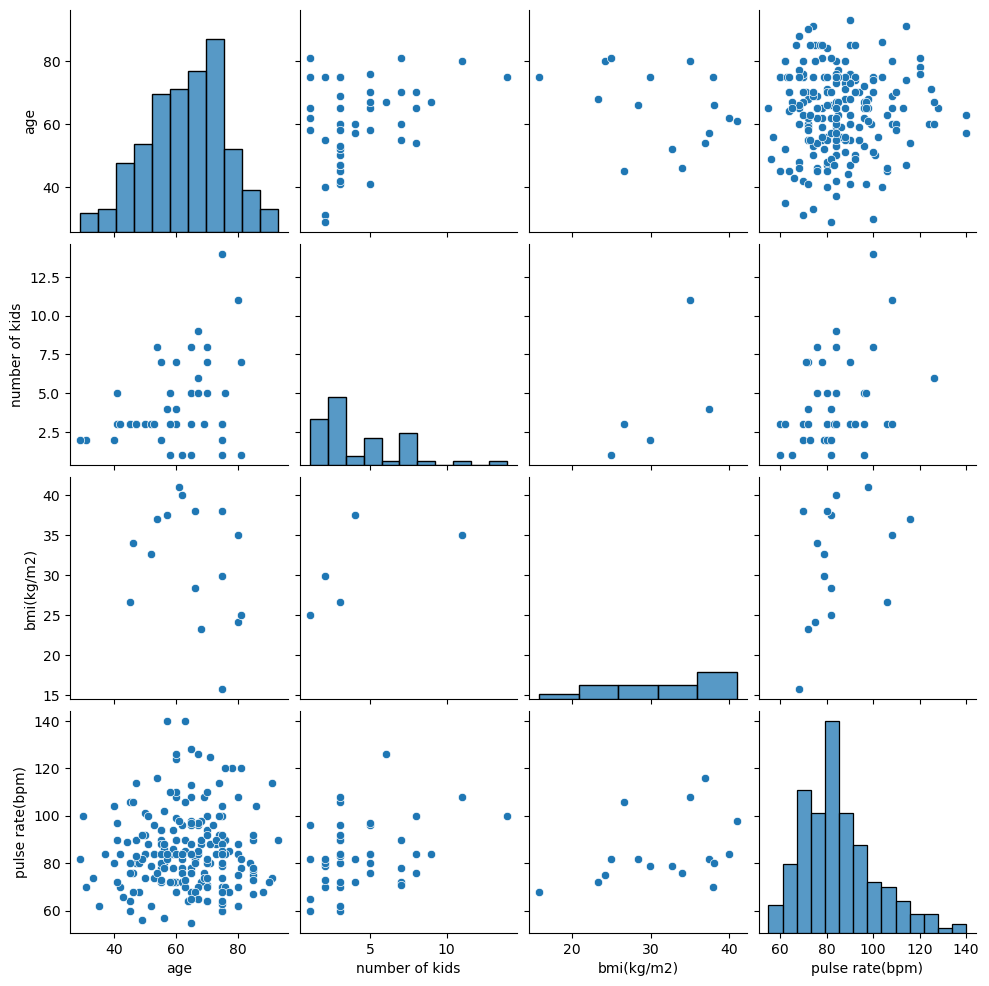

In [ ]:
sns.pairplot(cleaned_stoke_data)

C:\Users\Rodiyat\AppData\Local\Temp\ipykernel_14948\329607077.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_stoke_data['age'])


<Axes: xlabel='age', ylabel='Density'>

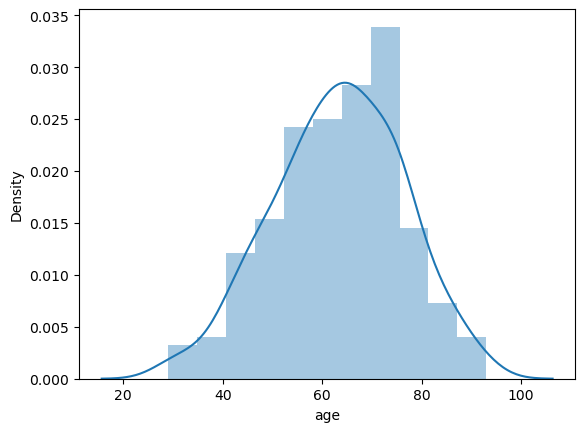

In [ ]:
sns.distplot(cleaned_stoke_data['age'])

create a dist plot that compares bp level, pulse rate, age and bmi

add documentation to the pairplot